# Anova

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds = pd.DataFrame(diamonds)

In [4]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds[['color','price']]

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,J,335
...,...,...
53935,D,2757
53936,D,2757
53937,D,2757
53938,H,2757


In [6]:
diamonds['log_price'] = np.log(diamonds['price'])

In [7]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898


In [8]:
new_diamonds = diamonds[['color','price', 'log_price']]

In [9]:
nombre_archivo = "new_diamonds.csv"  # guardamos la data limpia
new_diamonds.to_csv(nombre_archivo, index=False)

In [12]:
diamonds = pd.read_csv('new_diamonds.csv')
diamonds.head(5)

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,J,335,5.814131


<AxesSubplot:xlabel='color', ylabel='log_price'>

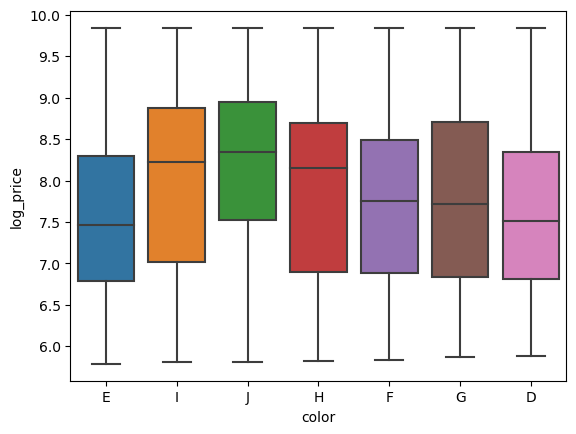

In [13]:
sns.boxplot(x='color', y='log_price', data=diamonds)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
model = ols(formula='log_price~ C(color)', data=diamonds).fit() #C indicate categorical variable

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.77e-301
Time:                        18:12:00   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**One way Anova test**

In [30]:
sm.stats.anova_lm(model, typ = 2) # typ= types of anova

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


In [33]:
diamonds2 = pd.read_csv('diamonds.csv')
diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131


In [36]:
diamonds2[['color','cut','price','log_price']]

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,E,Good,327,5.789960
3,I,Premium,334,5.811141
4,J,Good,335,5.814131
...,...,...,...,...
53935,D,Ideal,2757,7.921898
53936,D,Good,2757,7.921898
53937,D,Very Good,2757,7.921898
53938,H,Premium,2757,7.921898


**Two way Anova Test**

In [37]:
model2 = ols(formula='log_price ~ C(color)+ C(cut)+C(color): C(cut)', data=diamonds2).fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     72.53
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:01:28   Log-Likelihood:                -76115.
No. Observations:               53940   AIC:                         1.523e+05
Df Residuals:                   53905   BIC:                         1.526e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.1177      0.078    104.421      0.000       7.965       8.270
C(color)[T.E]                        -0.1964      0.102     -1.922      0.055      -0.397       0.004
C(color)[T.F]                        -0.1704      0.096     -1.776      0.076      -0.358       0.018
C(color)[T.G]                        -0.0672      0.096     -0.702      0.483      -0.255       0.121
C(color)[T.H]                         0.1715      0.096      1.779      0.075      -0.017       0.360
C(color)[T.I]                         0.0820      0.108      0.759      0.448      -0.130       0.294
C(color)[T.J]                         0.1077      0.120      0.900      0.368      -0.127       0.342
C(cut)[T.Good]                       -0.3935      0.087     -4.535      0.000      -0.564      -0.223
C(cut)[T.Ideal]                      -0.6610      0.080     -8.268      0.000      -0.818      -0.504
C(cut)[T.Premium]                    -0.3783      0.082     -4.636      0.000      -0.538      -0.218
C(cut)[T.Very Good]                  -0.4316      0.082     -5.274      0.000      -0.592      -0.271
C(color)[T.E]:C(cut)[T.Good]          0.1795      0.114      1.575      0.115      -0.044       0.403
C(color)[T.F]:C(cut)[T.Good]          0.2263      0.109      2.086      0.037       0.014       0.439
C(color)[T.G]:C(cut)[T.Good]          0.2571      0.109      2.367      0.018       0.044       0.470
C(color)[T.H]:C(cut)[T.Good]         -0.0026      0.110     -0.023      0.981      -0.219       0.214
C(color)[T.I]:C(cut)[T.Good]          0.2394      0.123      1.951      0.051      -0.001       0.480
C(color)[T.J]:C(cut)[T.Good]          0.2018      0.138      1.464      0.143      -0.068       0.472
C(color)[T.E]:C(cut)[T.Ideal]         0.1907      0.105      1.815      0.070      -0.015       0.397
C(color)[T.F]:C(cut)[T.Ideal]         0.3459      0.099      3.493      0.000       0.152       0.540
C(color)[T.G]:C(cut)[T.Ideal]         0.3024      0.099      3.066      0.002       0.109       0.496
C(color)[T.H]:C(cut)[T.Ideal]         0.1040      0.100      1.042      0.297      -0.092       0.300
C(color)[T.I]:C(cut)[T.Ideal]         0.2967      0.112      2.655      0.008       0.078       0.516
C(color)[T.J]:C(cut)[T.Ideal]         0.4380      0.126      3.488      0.000       0.192       0.684
C(color)[T.E]:C(cut)[T.Premium]       0.1585      0.107      1.480      0.139      -0.051       0.368
C(color)[T.F]:C(cut)[T.Premium]       0.3772      0.101      3.728      0.000       0.179       0.576
C(color)[T.G]:C(cut)[T.Premium]       0.2368      0.101      2.352      0.019       0.039       0.434
C(color)[T.H]:C(cut)[T.Premium]       0.1987      0.102      1.955      0.051      -0.000       0.398
C(color)[T.I]:C(cut)[T.

In [39]:
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1325.991186,6.0,224.341769,4.300381e-284
C(cut),901.918331,4.0,228.890609,3.250547e-195
C(color):C(cut),96.058742,24.0,4.062996,8.168980e-11
Residual,53101.684443,53905.0,NaN,NaN


In [48]:
diamond = pd.read_csv('new_diamonds.csv')

In [49]:
model_new = ols(formula='log_price ~ C(color)', data=diamond).fit()

In [50]:
sm.stats.anova_lm(model_new, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

In [52]:
turkey_oneway = pairwise_tukeyhsd(endog=diamond['log_price'], groups= diamond['color'], alpha=0.05)

In [53]:
turkey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.2115,-0.0842,0.0092,False
D,F,0.1455,0.0,0.0986,0.1924,True
D,G,0.1727,0.0,0.1273,0.2181,True
D,H,0.3015,0.0,0.2532,0.3499,True
D,I,0.4061,0.0,0.3522,0.4599,True
D,J,0.5291,0.0,0.4628,0.5953,True
E,F,0.183,0.0,0.1406,0.2255,True
E,G,0.2102,0.0,0.1694,0.251,True
E,H,0.339,0.0,0.295,0.3831,True
E,I,0.4436,0.0,0.3936,0.4935,True
